Task-1

•	Write a procedure that outputs a random signed graph according to the following model: on input $n$ (number of vertices) and $0<p^+,p^-<1$ with $p^++p^-<1$, determine, for each of the $\binom{n}{2}$ many vertex pairs~$e$ if $e$ is positive (with probability $p^+$) or negative (with probability $p^-$) or not present (with probability $1-p^+-p^-$)

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import itertools

In [2]:
def generate_random_signed_graph(n, p_plus, p_minus):
    if p_plus + p_minus >= 1:
        raise ValueError("p+ + p- should be less than 1.")

    G = nx.Graph()

    # Add n vertices to the graph
    G.add_nodes_from(range(n))

    # Generate edges with positive, negative, or no sign based on probabilities
    all_edges = list(itertools.combinations(range(n), 2))
    for edge in all_edges:
        prob = random.random()
        if prob < p_plus:
            sign = 1
        elif prob < p_plus + p_minus:
            sign = -1
        else:
            continue

        u, v = edge
        G.add_edge(u, v, sign=sign)

    return G

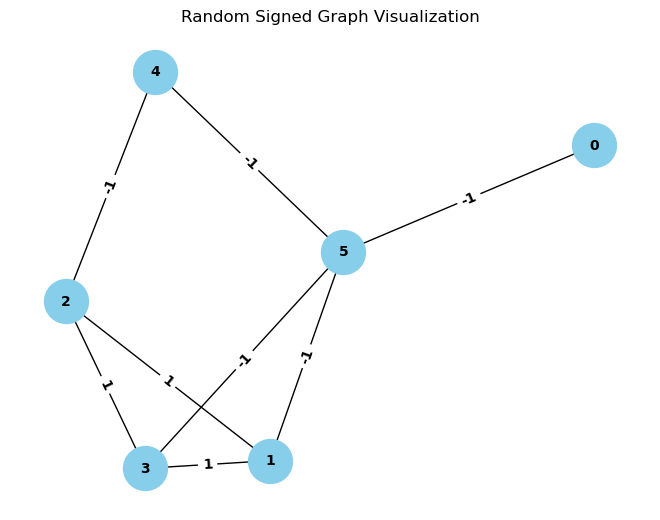

In [5]:
# Example usage:
n_vertices = 6
p_plus = 0.3
p_minus = 0.2
random_signed_graph = generate_random_signed_graph(n_vertices, p_plus, p_minus)

# Display the graph using NetworkX and matplotlib
pos = nx.spring_layout(random_signed_graph)
nx.draw(random_signed_graph, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(random_signed_graph, 'sign')
nx.draw_networkx_edge_labels(random_signed_graph, pos, edge_labels=labels, font_size=10, font_weight='bold')
plt.title("Random Signed Graph Visualization")
plt.show()

Task-1

•	Write a procedure that outputs a random signed graph according to the following model: on input $n$ (number of vertices) and $0<p^+,p^-<1$ with $p^++p^-<1$, determine, for each of the $\binom{n}{2}$ many vertex pairs~$e$ if $e$ is positive (with probability $p^+$) or negative (with probability $p^-$) or not present (with probability $1-p^+-p^-$)

In [4]:
import random
import itertools

In [45]:
def generate_random_signed_graphs(n, p_plus, p_minus):
    if p_plus + p_minus >= 1:
        raise ValueError("p+ + p- should be less than 1.")

    signed_graph = {str(i): [] for i in range(n)}
    print(signed_graph)

    # Generate edges with positive, negative, or no sign based on probabilities
    all_edges = list(itertools.combinations(range(n), 2))
    print(all_edges)
    for edge in all_edges:
        prob = random.random()
        if prob < p_plus:
            sign = 1
        elif prob < p_plus + p_minus:
            sign = -1
        else:
            continue

        u, v = edge
        signed_graph[str(u)].append((str(v), sign))
        signed_graph[str(v)].append((str(u), sign))

    return signed_graph

In [46]:

# Example usage:
n_vertices = 5
p_plus = 0.3
p_minus = 0.2
random_signed_graph = generate_random_signed_graphs(n_vertices, p_plus, p_minus)
print(random_signed_graph)

{'0': [], '1': [], '2': [], '3': [], '4': []}
[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
{'0': [('2', -1), ('3', 1)], '1': [('3', -1)], '2': [('0', -1), ('3', 1)], '3': [('0', 1), ('1', -1), ('2', 1)], '4': []}


In [48]:
#Just to convert the dictionary format as the simple edge list format
data = random_signed_graph
edge_list = []
for node, edges in data.items():
    for edge in edges:
        target_node, weight = edge
        edge_list.append(f"{node} {target_node} {weight}")

output = "\n".join(edge_list)
print(output)



0 2 -1
0 3 1
1 3 -1
2 0 -1
2 3 1
3 0 1
3 1 -1
3 2 1
